In [58]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat

In [60]:
## Collect data from files
# Collect cross-validation data for original dataset

folderPathOriginalDataset = r'C:\Users\Ethan\OneDrive\Documents\Projects\IN713C_Defect_Classification\originalDatasetModelInformation'
originalDataAccuracy = [] # Initialise variable to store accuracy of models produced on original dataset

# For loop to iterate through all the files in the path for the original dataset crossvalidation mat files
for root, dirs, files in os.walk(folderPathOriginalDataset):
    print(f"Searching in: {root}")
    for file in files:
        print(f"Found file: {file}")
        if file.endswith('.mat'):
            file_path = os.path.join(root,file)

            print(f"Processing file: {file_path}")

            matFileContent = loadmat(file_path) # Load the .mat file

            originalDataAccuracy.append(matFileContent['totalAccuracy'][0][0]) # Append the accuracy to the list

            print(matFileContent['totalAccuracy'][0][0])

# Collect cross-validation data for synthetic dataset

folderPathSyntheticDataset = r'C:\Users\Ethan\OneDrive\Documents\Projects\IN713C_Defect_Classification\syntheticDatasetModelInformation'
syntheticDataAccuracy = []

# For loop to iterate through all the files in the path for the synthetic dataset crossvalidation mat files
for root, dirs, files in os.walk(folderPathSyntheticDataset):
    print(f"Searching in: {root}")
    for file in files:
        print(f"Found file: {file}")
        if file.endswith('.mat'):
            file_path = os.path.join(root,file)

            print(f"Processing file: {file_path}")

            matFileContent = loadmat(file_path) # Load the .mat file

            syntheticDataAccuracy.append(matFileContent['totalAccuracy'][0][0]) # Append the accuracy to the list

            print(matFileContent['totalAccuracy'][0][0])

# Converting data into accuracies
originalDataAccuracy = [x * 100 for x in originalDataAccuracy]
syntheticDataAccuracy = [x * 100 for x in syntheticDataAccuracy]

print(originalDataAccuracy[0])

Searching in: C:\Users\Ethan\OneDrive\Documents\Projects\IN713C_Defect_Classification\originalDatasetModelInformation
Found file: model_10_info.mat
Processing file: C:\Users\Ethan\OneDrive\Documents\Projects\IN713C_Defect_Classification\originalDatasetModelInformation\model_10_info.mat
0.8986111111111111
Found file: model_1_info.mat
Processing file: C:\Users\Ethan\OneDrive\Documents\Projects\IN713C_Defect_Classification\originalDatasetModelInformation\model_1_info.mat
0.8909722222222223
Found file: model_2_info.mat
Processing file: C:\Users\Ethan\OneDrive\Documents\Projects\IN713C_Defect_Classification\originalDatasetModelInformation\model_2_info.mat
0.8972222222222223
Found file: model_3_info.mat
Processing file: C:\Users\Ethan\OneDrive\Documents\Projects\IN713C_Defect_Classification\originalDatasetModelInformation\model_3_info.mat
0.8895833333333333
Found file: model_4_info.mat
Processing file: C:\Users\Ethan\OneDrive\Documents\Projects\IN713C_Defect_Classification\originalDatasetMod

C:\Users\Ethan\AppData\Local\Temp\ipykernel_20840\871575613.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([originalDataAccuracy, syntheticDataAccuracy], labels=['Original', 'Synthetic'], widths=0.3)
C:\Users\Ethan\AppData\Local\Temp\ipykernel_20840\871575613.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8) # Set the legend


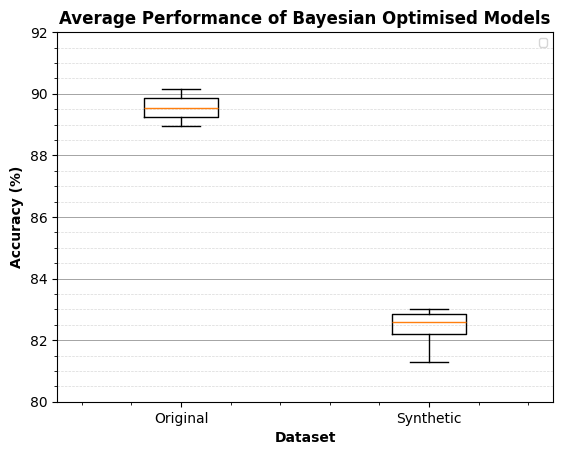

In [ ]:
## Plot Box Plot to show data
plt.figure()
plt.boxplot([originalDataAccuracy, syntheticDataAccuracy], labels=['Original', 'Synthetic'], widths=0.3)

# Add labels, title, and legend
plt.xlabel('Dataset', fontweight='bold', fontsize=10) # Set the x-label
plt.ylabel('Accuracy (%)', fontweight='bold', fontsize=10) # Set the y-label
plt.yticks(np.arange(80, 95, 2)) # Create ticks for the plot
plt.minorticks_on()

plt.title('Average Performance of Bayesian Optimised Models', fontweight='bold', fontsize=12) # Set the title of the graph
plt.legend(fontsize=8) # Set the legend
plt.ylim(80, 92)
plt.grid(which='major', color='gray', linewidth=0.5, alpha=0.8, axis='y') # Create a grid for the plot
plt.grid(which='minor', color='grey', linewidth=0.5, alpha=0.3, axis='y', linestyle='--') # Create a minor grid

plt.savefig('crossValidation_accuracy_1.png', dpi=5000, bbox_inches='tight')
plt.show()

In [ ]:
## Produce statistical data summarising performance of bayesian optimised thingies
summary_data = {
    "Dataset": ["Original", "Synthetic"],
    "Mean": [np.mean(originalDataAccuracy), np.mean(syntheticDataAccuracy)],
    "Median": [np.median(originalDataAccuracy), np.median(syntheticDataAccuracy)],
    "Std Dev": [np.std(originalDataAccuracy), np.std(syntheticDataAccuracy)],
    "Min": [np.min(originalDataAccuracy), np.min(syntheticDataAccuracy)],
    "Max": [np.max(originalDataAccuracy), np.max(syntheticDataAccuracy)],
    "Range": [np.ptp(originalDataAccuracy), np.ptp(syntheticDataAccuracy)]
}

summary_table = pd.DataFrame(summary_data)

# Display the summary table
print(summary_table)